## What are the most demanded skills for the top 3 most popular data roles in India?

### Methodology
1. Clean-up skill column
2. Calculate skill count based on `job_title_short`
3. Calculate skill percentage
4. Plot final findings Calculate skill count based on `job_title_short`


### Libraries Importation

In [ ]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\User\Downloads\data_jobs.csv')


### Data Cleaning

In [2]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

def to_list(skill_list):
    if pd.notna(skill_list):
        return ast.literal_eval(skill_list)
    
df['job_skills'] = df['job_skills'].apply(to_list)

### Filtering for India

In [3]:
df_india = df[df['job_country']== 'India'].copy()

### Skill Count

In [4]:
df_skills = df_india.explode('job_skills')
df_skill_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skill_count = df_skill_count.reset_index(name= 'skill_count')
df_skill_count.sort_values(by= 'skill_count', ascending= False, inplace= True)
df_skill_count

,job_skills,job_title_short,skill_count
1374,sql,Data Engineer,12993
1088,python,Data Engineer,11568
1089,python,Data Scientist,9248
1327,spark,Data Engineer,7157
103,aws,Data Engineer,6993
...,...,...,...
940,openstack,Cloud Engineer,1
1685,zoom,Senior Data Analyst,1
10,airtable,Business Analyst,1
1662,workfront,Data Analyst,1


### Skill Percentage

In [5]:
df_skills_job = df_skills.groupby('job_title_short').size().reset_index(name= 'total_count')
df_skill_percent = df_skill_count.merge(right= df_skills_job, on= 'job_title_short', how= 'left')
df_skill_percent['skill_percentage'] = (df_skill_percent['skill_count']/df_skill_percent['total_count'])*100
df_skill_percent


,job_skills,job_title_short,skill_count,total_count,skill_percentage
0,sql,Data Engineer,12993,128144,10.139374
1,python,Data Engineer,11568,128144,9.027344
2,python,Data Scientist,9248,70549,13.108620
3,spark,Data Engineer,7157,128144,5.585123
4,aws,Data Engineer,6993,128144,5.457142
...,...,...,...,...,...
1684,openstack,Cloud Engineer,1,1877,0.053277
1685,zoom,Senior Data Analyst,1,4916,0.020342
1686,airtable,Business Analyst,1,6292,0.015893
1687,workfront,Data Analyst,1,23525,0.004251


### Skill count percentage plot for the top 3 roles in India

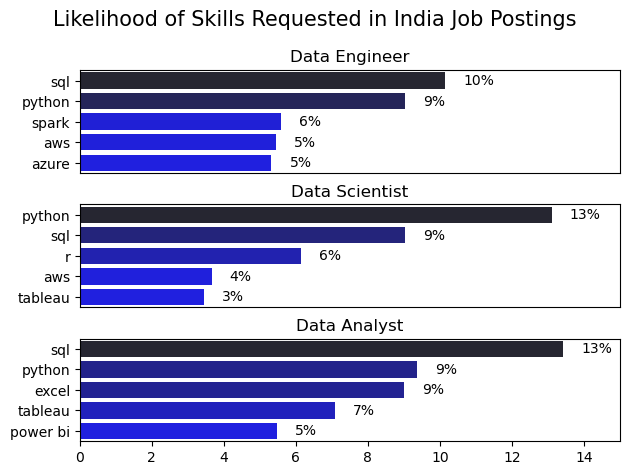

In [7]:
# top 3 roles in india
job_titles = df_skill_count['job_title_short'].unique().tolist()
job_titles = job_titles[:3]

fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skill_percent[df_skill_percent['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percentage', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 15)
    # remove the x-axis tick labels for better readability
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

    # label the percentage on the bars
    for n, v in enumerate(df_plot['skill_percentage']):
        ax[i].text(v + .5, n, f'{v:.0f}%', va='center')

fig.suptitle('Likelihood of Skills Requested in India Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()